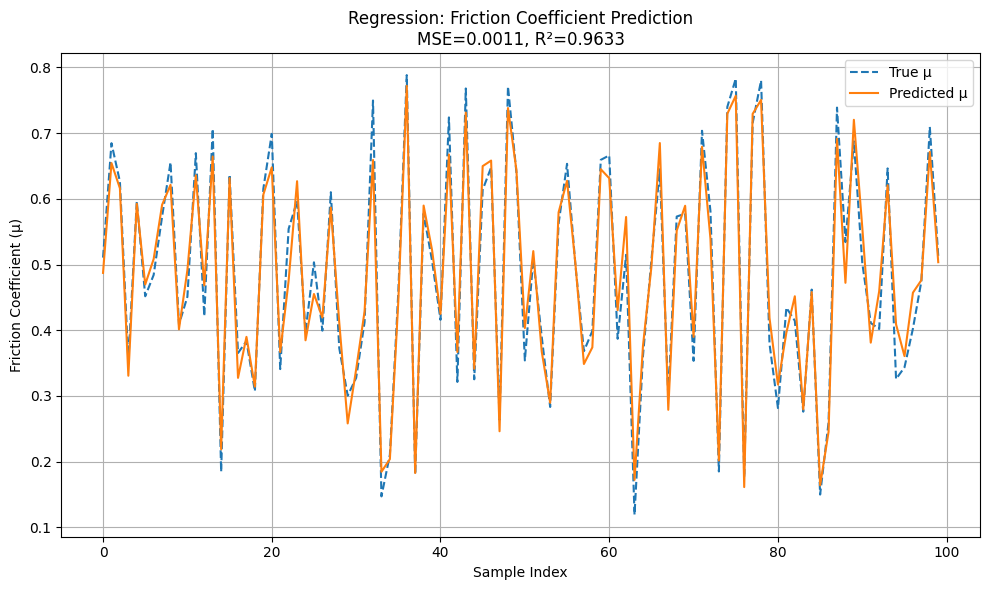

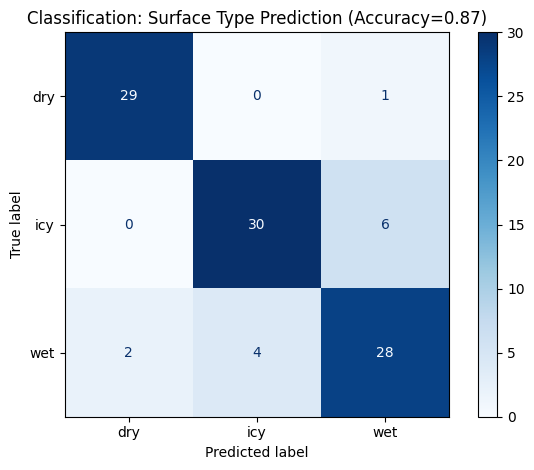

In [ ]:
# Re-run the extended code after reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Simulate a dataset
np.random.seed(42)
n_samples = 500

# Simulated features: ax, ay, slip_ratio, temperature, road_texture_score
ax = np.random.normal(loc=0.5, scale=0.2, size=n_samples)
ay = np.random.normal(loc=0.3, scale=0.15, size=n_samples)
slip_ratio = np.random.uniform(0, 1, n_samples)
temperature = np.random.uniform(-10, 35, n_samples)
road_texture_score = np.random.uniform(0, 1, n_samples)

# Simulated output: friction coefficient (mu)
mu = 0.8 - 0.3 * slip_ratio - 0.01 * (35 - temperature) + 0.1 * road_texture_score
mu += np.random.normal(scale=0.02, size=n_samples)  # add some noise

# Classify based on mu
def classify_mu(mu_value):
    if mu_value > 0.6:
        return 'dry'
    elif mu_value > 0.4:
        return 'wet'
    else:
        return 'icy'

mu_class = np.array([classify_mu(m) for m in mu])

# Create DataFrame
df = pd.DataFrame({
    'ax': ax,
    'ay': ay,
    'slip_ratio': slip_ratio,
    'temperature': temperature,
    'road_texture_score': road_texture_score,
    'mu': mu,
    'mu_class': mu_class
})

# Regression
X_reg = df.drop(columns=['mu', 'mu_class'])
y_reg = df['mu']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

# Classification
X_cls = df.drop(columns=['mu', 'mu_class'])
y_cls = df['mu_class']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

cls_model = RandomForestClassifier(n_estimators=100, random_state=42)
cls_model.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_model.predict(X_test_cls)
acc = accuracy_score(y_test_cls, y_pred_cls)

# Plot regression results
plt.figure(figsize=(10, 6))
plt.plot(y_test_reg.values, label='True μ', linestyle='--')
plt.plot(y_pred_reg, label='Predicted μ', linestyle='-')
plt.title(f"Regression: Friction Coefficient Prediction\nMSE={mse:.4f}, R²={r2:.4f}")
plt.xlabel("Sample Index")
plt.ylabel("Friction Coefficient (μ)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot classification confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls, labels=cls_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Classification: Surface Type Prediction (Accuracy={acc:.2f})")
plt.tight_layout()
plt.show()
